### Importamos librerías:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

### Leemos los datos:

In [2]:
X_train0 = pd.read_csv("../data/X_train0.csv").drop('Unnamed: 0', axis=1)
X_train1 = pd.read_csv("../data/X_train1.csv").drop('Unnamed: 0', axis=1)
X_val = pd.read_csv("../data/X_validacion.csv").drop('Unnamed: 0', axis=1)
X_test = pd.read_csv("../data/X_test.csv").drop('Unnamed: 0', axis=1)
y_train0 = pd.read_csv("../data/y_train0.csv").drop('Unnamed: 0', axis=1)
y_train1 = pd.read_csv("../data/y_train1.csv").drop('Unnamed: 0', axis=1)
y_val = pd.read_csv("../data/y_validacion.csv").drop('Unnamed: 0', axis=1)
y_test = pd.read_csv("../data/y_test.csv").drop('Unnamed: 0', axis=1)


In [3]:
X_train = X_train1
y_train = y_train1

### Modelo Base:

In [4]:
# Crear el modelo base que siempre predice el valor mayoritario
dummy_model = DummyClassifier(strategy="most_frequent")

In [5]:
# Entrenar el modelo
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [6]:
# Predecir en el conjunto de prueba
y_pred = dummy_model.predict(X_val)

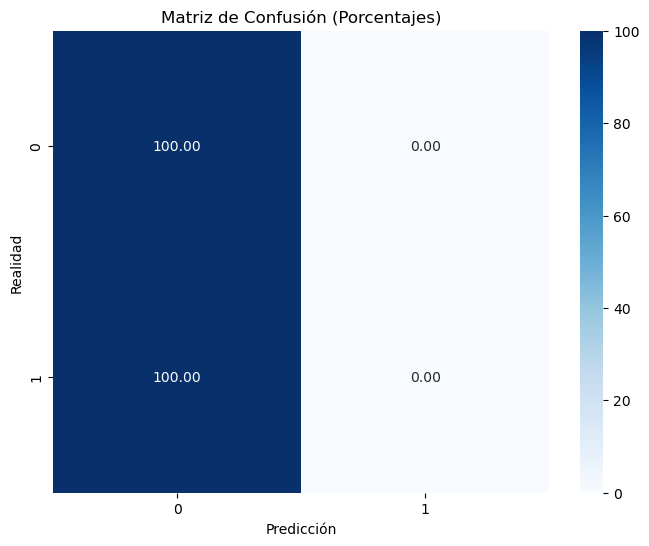


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197860
           1       0.00      0.00      0.00      2140

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000



C:\Users\manue\anaconda3\envs\P0AprendizajeAutomatico\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manue\anaconda3\envs\P0AprendizajeAutomatico\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manue\anaconda3\envs\P0AprendizajeAutomatico\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [7]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred)

# Calcular la matriz de confusión en términos porcentuales
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Crear un DataFrame para la visualización con seaborn
conf_matrix_df = pd.DataFrame(conf_matrix_percent, index=["0", "1"], columns=["0", "1"])

# Visualizar la matriz de confusión con colores usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Confusión (Porcentajes)")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

# Imprimir un informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_val, y_pred))

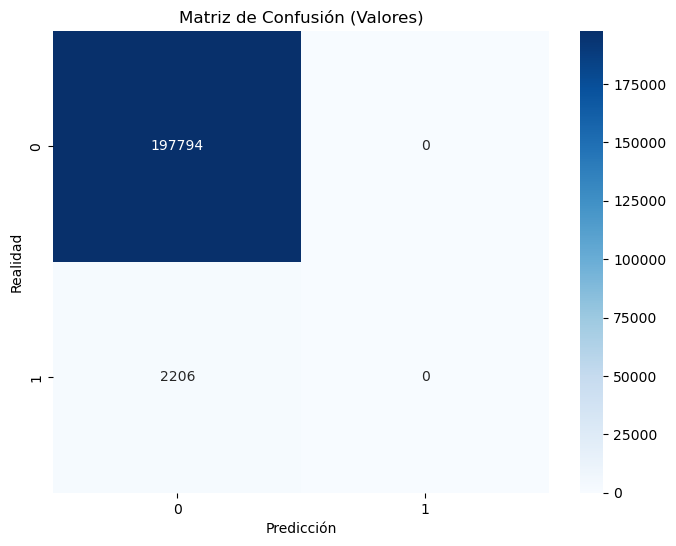

In [8]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un DataFrame para la visualización con seaborn
conf_matrix_df = pd.DataFrame(conf_matrix, index=["0", "1"], columns=["0", "1"])

# Visualizar la matriz de confusión con colores usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (Valores)")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

El modelo está prediciendo la clase mayoritaria (0) en todos los casos y no está prediciendo la clase minoritaria (1).

Precision (Precisión):
La precisión mide la proporción de instancias positivas predichas correctamente sobre el total de instancias positivas predichas. Dado que tu modelo siempre predice 0, la precisión para la clase 1 es 0, ya que no hay predicciones positivas para esta clase.

Recall:
El recall mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo. En este caso, como el modelo nunca predice la clase 1, el recall para la clase 1 es 0.

F1-Score:

El F1-Score es la media armónica de precisión y recuperación. Dado que la recuperación es 0 para la clase 1, el F1-Score también será 0.

Accuracy (Exactitud): 
La exactitud es la proporción de instancias clasificadas correctamente sobre el total de instancias. En este caso, la alta exactitud (0,99)  se debe a que la mayoría de las instancias pertenecen a la clase 0, y el modelo está prediciendo esta clase en todos los casos.